# Swiggy vs Zomato Analysis

This project analyzes and compares customer reviews of two major Indian food delivery apps — **Swiggy** and **Zomato** — using data scraped from the Google Play Store and Reddit. Reviews are scraped from Google Play Store and opinions, posts are scraped from Reddit in order to assess public sentiment and opinion.

We aim to understand:
- User satisfaction trends
- Public opinion and sentiment scores
- Review volume and sentiment patterns

The analysis involves scraping ~25,000 reviews per app and processing the text data to extract meaningful insights


## Importing and Scraping Data (Google Play Reviews)

In [1]:
!pip install google-play-scraper
from google_play_scraper import app, Sort, reviews
import pandas as pd

In [2]:
apps = {
    'Swiggy': 'in.swiggy.android',
    'Zomato': 'com.application.zomato'
}

In [3]:
def get_reviews(app_id, app_name, count=25000):
    result, _ = reviews(
        app_id,
        lang='en',
        country='in',
        sort=Sort.NEWEST,
        count=count
    )
    df = pd.DataFrame(result)
    df['app'] = app_name
    return df

In [4]:
df_swiggy = get_reviews(apps['Swiggy'], 'Swiggy')
df_zomato = get_reviews(apps['Zomato'], 'Zomato')

In [5]:
# Combine and export
df_all_reviews = pd.concat([df_swiggy, df_zomato])
df_all_reviews.to_csv("playstore_reviews.csv", index=False)

## Dataset Description
This dataset contains user reviews scraped from the Google Play Store for two major Indian food delivery apps: **Swiggy** and **Zomato**.
Each record corresponds to a single user review, including its content, rating, and app response (if any). There are **25,000 reviews per app scraped (50,000+ total)**. These are the key columns:

`reviewId`: Unique identifier for each review 

`content` : The actual text content of the user review

`score` : Star rating given (1 to 5)

`thumbsUpCount`: Number of likes/upvotes on the review

`at` : Timestamp when the review was posted

`replyContent` : App's official reply to the review (if present)

`app` : Name of the app: either "Swiggy" or "Zomato"

In [6]:
df_all_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,app
0,9303b9e0-259f-4c4b-8e64-1bc534fffd36,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I don't want,1,0,None,2025-08-06 08:21:59,"Hi there, we are sorry for any hassle you have...",2025-08-06 08:22:38,None,Swiggy
1,13eabff3-c6e6-442b-accd-f54b64b85320,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,not delivering on the mentioned timeline.,1,0,4.85.2,2025-08-06 08:16:15,"Hey there, we apologize for the inconvenience ...",2025-08-06 08:22:39,4.85.2,Swiggy
2,3f9671fc-ad73-4fb9-b3fe-b1124e643fb1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"when i apply bhim upi as payment, the applicat...",1,0,4.84.2,2025-08-06 08:11:08,"Hey there, we are sorry to have put you throug...",2025-08-06 08:12:23,4.84.2,Swiggy
3,16ff5de5-f9c4-410b-b8cc-8b659b39ab75,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Service delivery is fast,5,0,4.85.2,2025-08-06 07:50:49,"Hey, we are glad to have patrons like you and ...",2025-08-06 07:52:55,4.85.2,Swiggy
4,b65e664b-03b8-4448-9b2a-03dc7a219fb0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,hate their customer support worst experience a...,1,0,4.85.2,2025-08-06 07:45:44,"Greetings, we sincerely apologize for the trou...",2025-08-06 13:24:16,4.85.2,Swiggy


In [7]:
df_all_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              50000 non-null  object        
 1   userName              50000 non-null  object        
 2   userImage             50000 non-null  object        
 3   content               50000 non-null  object        
 4   score                 50000 non-null  int64         
 5   thumbsUpCount         50000 non-null  int64         
 6   reviewCreatedVersion  43046 non-null  object        
 7   at                    50000 non-null  datetime64[ns]
 8   replyContent          35527 non-null  object        
 9   repliedAt             35527 non-null  datetime64[ns]
 10  appVersion            43046 non-null  object        
 11  app                   50000 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 5.0+ MB


In [8]:
df_all_reviews['thumbsUpCount'].value_counts()

thumbsUpCount
0     48744
1       705
2       139
3        83
4        59
      ...  
75        1
74        1
69        1
40        1
60        1
Name: count, Length: 102, dtype: int64

In [9]:
df_all_reviews.drop(columns=['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent','appVersion','repliedAt'],inplace=True)


##### The data is cleaned and irrelevant data is removed to make the dataset fit for furthur sentiment analysis and creating effective visualizations to gather insights.

In [10]:
df_swiggy.drop(columns=['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent','appVersion','repliedAt'],inplace=True)
df_zomato.drop(columns=['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent','appVersion','repliedAt'],inplace=True)

In [11]:
df_all_reviews['at'] = pd.to_datetime(df_all_reviews['at'])
df_all_reviews['year'] = df_all_reviews['at'].dt.year

df_all_reviews.head()


,content,score,at,app,year
0,I don't want,1,2025-08-06 08:21:59,Swiggy,2025
1,not delivering on the mentioned timeline.,1,2025-08-06 08:16:15,Swiggy,2025
2,"when i apply bhim upi as payment, the applicat...",1,2025-08-06 08:11:08,Swiggy,2025
3,Service delivery is fast,5,2025-08-06 07:50:49,Swiggy,2025
4,hate their customer support worst experience a...,1,2025-08-06 07:45:44,Swiggy,2025


In [12]:
df_all_reviews['month'] = df_all_reviews['at'].dt.month
df_all_reviews

,content,score,at,app,year,month
0,I don't want,1,2025-08-06 08:21:59,Swiggy,2025,8
1,not delivering on the mentioned timeline.,1,2025-08-06 08:16:15,Swiggy,2025,8
2,"when i apply bhim upi as payment, the applicat...",1,2025-08-06 08:11:08,Swiggy,2025,8
3,Service delivery is fast,5,2025-08-06 07:50:49,Swiggy,2025,8
4,hate their customer support worst experience a...,1,2025-08-06 07:45:44,Swiggy,2025,8
...,...,...,...,...,...,...
24995,Is is one of best app for ordering food,5,2025-07-06 19:04:15,Zomato,2025,7
24996,nice,4,2025-07-06 19:04:13,Zomato,2025,7
24997,good,4,2025-07-06 19:04:12,Zomato,2025,7
24998,excellent,5,2025-07-06 19:02:44,Zomato,2025,7


In [13]:
import re
import string

##### Text pre-processing is done in order to make the data fit for sentiment analysis to gather meaningful insights.

In [14]:
df_all_reviews['content'] = df_all_reviews['content'].str.lower()

In [15]:
df_all_reviews['content'] = df_all_reviews['content'].str.translate(str.maketrans('', '', string.punctuation))

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df_all_reviews['content'] = df_all_reviews['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

## Importing and Scraping Data (Reddit Opinion Posts)

In [18]:
import praw

In [19]:
reddit = praw.Reddit(
    client_id="",
    client_secret="",
    user_agent="",
    username="",
    password=""
)

In [20]:
#function to search and label posts
def fetch_reddit_posts(query, app_label):
    posts = []
    for submission in reddit.subreddit('india+IndianStartups+delhi+swiggy+zomato+FoodIndia+bangalore+AskIndia').search(query, limit=5000):
        title = submission.title
        body = submission.selftext
        text = (title + ' ' + body).lower()

        if "swiggy" in text and "zomato" in text:
            continue
        if app_label.lower() not in text:
            continue 

        posts.append([
            title,
            body,
            submission.score,
            submission.num_comments,
            str(submission.created_utc),
            submission.subreddit.display_name,
            submission.url,
            app_label
        ])
    
    return posts

In [21]:
swiggy_posts = fetch_reddit_posts("Swiggy", "Swiggy")
zomato_posts = fetch_reddit_posts("Zomato", "Zomato")

In [24]:
swiggy_posts = pd.DataFrame(swiggy_posts, columns=['title', 'body', 'upvotes', 'comments', 'timestamp', 'subreddit', 'url', 'app'])
zomato_posts = pd.DataFrame(zomato_posts, columns=['title', 'body', 'upvotes', 'comments', 'timestamp', 'subreddit', 'url', 'app'])

In [32]:
df_reddit = pd.concat([swiggy_posts, zomato_posts], ignore_index=True)
df_reddit.to_csv("reddit_clean_swz.csv", index=False)

## Dataset Description

This dataset contains user comments scraped from **Reddit** using the Python Reddit API Wrapper (**PRAW**). The comments were collected from selected subreddits relevant to the topic (e.g., food delivery, startups, india, etc.).

Each record corresponds to a single Reddit comment, along with metadata related to the post and subreddit. These are the key columns:

- `title`: Title of the reddit post  
- `subreddit`: Name of the subreddit where the reddit post was uploaded  
- `body`: Full text of the post content  
- `upvotes`: Upvotes on the post  
- `timestamp`: Timestamp when the reddit post was uploaded
- `url`: Permanent URL to the post
- `app`: App that is being referenced in the reddit post



In [34]:
df_reddit.head(10)

,title,body,upvotes,comments,timestamp,subreddit,url,app
0,Swiggy guy told the truth,Swiggy delivery partner shocked me today \n\nH...,1600,241,1746274805.0,swiggy,https://www.reddit.com/r/swiggy/comments/1kdrn...,Swiggy
1,Someone is definitely losing their job at Swiggy,"People started unexpectedly receiving ₹4,000 t...",910,111,1739017308.0,india,https://www.reddit.com/gallery/1ikm3ni,Swiggy
2,WORST EXPERIENCE,"I ordered food on Swiggy last night, and it wa...",170,57,1748146300.0,swiggy,https://www.reddit.com/gallery/1kuttae,Swiggy
3,Created an App QuickCompare to compare prices ...,,4068,419,1739768136.0,india,https://quickcompare.app.link/qc,Swiggy
4,Created an App QuickCompare to compare prices ...,,3028,423,1739735753.0,delhi,https://quickcompare.app.link/qc,Swiggy
5,"With a heavy heart, I have uninstalled Swiggy",I had ordered a proper dinner after a long tim...,2507,289,1747243721.0,delhi,https://i.redd.it/gsqlso3n8s0f1.jpeg,Swiggy
6,Swiggy Instamart gave me 2 ridge gourds for fr...,,4957,241,1736864688.0,india,https://www.reddit.com/gallery/1i1767j,Swiggy
7,Domino’s x Swiggy : Party Ruined,Ordered a large pizza from dominos via swiggy ...,2803,215,1747492471.0,swiggy,https://i.redd.it/bao166vasc1f1.png,Swiggy
8,Looks like Swiggy’s not selling eggs and meat ...,When did this start happening?,1462,358,1740558695.0,india,https://www.reddit.com/gallery/1iyiygo,Swiggy
9,If you order 1kg potato on Swiggy you can now ...,,2369,102,1753337430.0,swiggy,https://i.redd.it/fky3vu5dkref1.jpeg,Swiggy


In [36]:
df_reddit.tail(10)

,title,body,upvotes,comments,timestamp,subreddit,url,app
361,The Delivery Boy,"Today, in the scorching summer heat, my food d...",3804,65,1746233826.0,Zomato,https://i.redd.it/q3j71a6ntgye1.jpeg,Zomato
362,Did Zomato sell off their employees?,"Payment made on 9:49 PM, the delivery guy pick...",23,13,1749896633.0,Zomato,https://www.reddit.com/gallery/1lb5gzg,Zomato
363,Zomato Delivery Guy asked for money,So I ordered something off Zomato and they guy...,156,74,1693128010.0,delhi,https://www.reddit.com/r/delhi/comments/162lmo...,Zomato
364,"Zomato hits another controversy: Hindu, Muslim...",,267,154,1565513743.0,india,https://www.indiatoday.in/india/story/zomato-h...,Zomato
365,🚨 Zomato is EXPLOITING employees — Exposing th...,Let me blow the lid off what’s really happenin...,91,16,1742928218.0,Zomato,https://www.reddit.com/r/Zomato/comments/1jjqu...,Zomato
366,Don't buy from Zomato,I was shown in the app that cancellation would...,4,7,1754248371.0,Zomato,https://i.redd.it/3a4myk62tugf1.png,Zomato
367,Thanks for nothing zomato,Wow so the resturant makes a mistake and doesn...,31,15,1747358282.0,Zomato,https://www.reddit.com/gallery/1knoq4s,Zomato
368,I need help against zomato scam,\n\nThis morning at 2:38 I placed an order fro...,2,10,1752375052.0,AskIndia,https://www.reddit.com/r/AskIndia/comments/1ly...,Zomato
369,What the fuck is this sorcery?,So basically ordered noodles and momos at ~10 ...,1494,102,1751565796.0,Zomato,https://www.reddit.com/gallery/1lqwep7,Zomato
370,"Zomato scamming people, taking double prices f...",I bought gajar halwa from Nathus Sweets. The a...,0,35,1737992498.0,delhi,https://www.reddit.com/gallery/1ibc1fx,Zomato


In [38]:
df_reddit['app'].value_counts()

app
Swiggy    193
Zomato    178
Name: count, dtype: int64

In [40]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      371 non-null    object
 1   body       371 non-null    object
 2   upvotes    371 non-null    int64 
 3   comments   371 non-null    int64 
 4   timestamp  371 non-null    object
 5   subreddit  371 non-null    object
 6   url        371 non-null    object
 7   app        371 non-null    object
dtypes: int64(2), object(6)
memory usage: 23.3+ KB


##### The data is cleaned and irrelevant data is removed to make the dataset fit for furthur sentiment analysis and creating effective visualizations to gather insights.

In [42]:
df_reddit.drop(columns=['upvotes','comments','subreddit','url'], inplace=True)
df_reddit

,title,body,timestamp,app
0,Swiggy guy told the truth,Swiggy delivery partner shocked me today \n\nH...,1746274805.0,Swiggy
1,Someone is definitely losing their job at Swiggy,"People started unexpectedly receiving ₹4,000 t...",1739017308.0,Swiggy
2,WORST EXPERIENCE,"I ordered food on Swiggy last night, and it wa...",1748146300.0,Swiggy
3,Created an App QuickCompare to compare prices ...,,1739768136.0,Swiggy
4,Created an App QuickCompare to compare prices ...,,1739735753.0,Swiggy
...,...,...,...,...
366,Don't buy from Zomato,I was shown in the app that cancellation would...,1754248371.0,Zomato
367,Thanks for nothing zomato,Wow so the resturant makes a mistake and doesn...,1747358282.0,Zomato
368,I need help against zomato scam,\n\nThis morning at 2:38 I placed an order fro...,1752375052.0,Zomato
369,What the fuck is this sorcery?,So basically ordered noodles and momos at ~10 ...,1751565796.0,Zomato


In [44]:
swiggy_posts.drop(columns=['upvotes','comments','subreddit','url'], inplace=True)
zomato_posts.drop(columns=['upvotes','comments','subreddit','url'], inplace=True)

In [46]:
df_reddit['text'] = df_reddit['title'].fillna('') + ' ' + df_reddit['body'].fillna('')

In [48]:
df_reddit['timestamp'] = pd.to_datetime(df_reddit['timestamp'], unit='s', errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_6300\1634924247.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_reddit['timestamp'] = pd.to_datetime(df_reddit['timestamp'], unit='s', errors='coerce')


In [50]:
swiggy_posts['timestamp'] = pd.to_datetime(swiggy_posts['timestamp'], unit='s', errors='coerce')
zomato_posts['timestamp'] = pd.to_datetime(zomato_posts['timestamp'], unit='s', errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_6300\3442724973.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  swiggy_posts['timestamp'] = pd.to_datetime(swiggy_posts['timestamp'], unit='s', errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_6300\3442724973.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  zomato_posts['timestamp'] = pd.to_datetime(zomato_posts['timestamp'], unit='s', errors='coerce')


In [52]:
df_reddit

,title,body,timestamp,app,text
0,Swiggy guy told the truth,Swiggy delivery partner shocked me today \n\nH...,2025-05-03 12:20:05,Swiggy,Swiggy guy told the truth Swiggy delivery part...
1,Someone is definitely losing their job at Swiggy,"People started unexpectedly receiving ₹4,000 t...",2025-02-08 12:21:48,Swiggy,Someone is definitely losing their job at Swig...
2,WORST EXPERIENCE,"I ordered food on Swiggy last night, and it wa...",2025-05-25 04:11:40,Swiggy,WORST EXPERIENCE I ordered food on Swiggy last...
3,Created an App QuickCompare to compare prices ...,,2025-02-17 04:55:36,Swiggy,Created an App QuickCompare to compare prices ...
4,Created an App QuickCompare to compare prices ...,,2025-02-16 19:55:53,Swiggy,Created an App QuickCompare to compare prices ...
...,...,...,...,...,...
366,Don't buy from Zomato,I was shown in the app that cancellation would...,2025-08-03 19:12:51,Zomato,Don't buy from Zomato I was shown in the app t...
367,Thanks for nothing zomato,Wow so the resturant makes a mistake and doesn...,2025-05-16 01:18:02,Zomato,Thanks for nothing zomato Wow so the resturant...
368,I need help against zomato scam,\n\nThis morning at 2:38 I placed an order fro...,2025-07-13 02:50:52,Zomato,I need help against zomato scam \n\nThis morni...
369,What the fuck is this sorcery?,So basically ordered noodles and momos at ~10 ...,2025-07-03 18:03:16,Zomato,What the fuck is this sorcery? So basically or...


In [54]:
df_reddit['text'] = df_reddit['text'].str.lower()
df_reddit['text'] = df_reddit['text'].str.translate(str.maketrans('', '', string.punctuation))

In [56]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [60]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df_reddit['text'] = df_reddit['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [64]:
df_all_reviews.groupby('app')['score'].mean()

app
Swiggy    3.5732
Zomato    4.2312
Name: score, dtype: float64

## Sentiment Analysis

To better understand user opinions beyond just star ratings, we performed **sentiment analysis** on the review content using **natural language processing (NLP)**.

Each review was classified as **Positive**, **Negative**, or **Neutral** based on its textual content using a sentiment scoring technique. This helps uncover emotional tone even when users give similar star ratings but express different sentiments in their comments.

### Approach:
- The review `content` was analyzed using VADER sentiment analysis.
- A new column `sentiment` was added to classify each review accordingly.

### Insights: 

This analysis reveals trends not visible through ratings alone.

> Sentiment analysis enhances the depth of feedback understanding.
decisions.


In [66]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [68]:
sia = SentimentIntensityAnalyzer()

In [70]:
# Google Play Reviews
df_all_reviews['sentiment_score'] = df_all_reviews['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Reddit
df_reddit['sentiment_score'] = df_reddit['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [71]:
def label_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df_all_reviews['sentiment'] = df_all_reviews['sentiment_score'].apply(label_sentiment)
df_reddit['sentiment'] = df_reddit['sentiment_score'].apply(label_sentiment)

In [76]:
df_reddit.groupby('app')['sentiment'].value_counts()

app     sentiment
Swiggy  positive     95
        negative     68
        neutral      30
Zomato  positive     74
        negative     68
        neutral      36
Name: count, dtype: int64

In [78]:
df_all_reviews

,content,score,at,app,year,month,sentiment_score,sentiment
0,dont want,1,2025-08-06 08:21:59,Swiggy,2025,8,-0.0572,negative
1,delivering mentioned timeline,1,2025-08-06 08:16:15,Swiggy,2025,8,0.0000,neutral
2,apply bhim upi payment application blocked giv...,1,2025-08-06 08:11:08,Swiggy,2025,8,-0.2732,negative
3,service delivery fast,5,2025-08-06 07:50:49,Swiggy,2025,8,0.0000,neutral
4,hate customer support worst experience 2nd time,1,2025-08-06 07:45:44,Swiggy,2025,8,-0.7269,negative
...,...,...,...,...,...,...,...,...
24995,one best app ordering food,5,2025-07-06 19:04:15,Zomato,2025,7,0.6369,positive
24996,nice,4,2025-07-06 19:04:13,Zomato,2025,7,0.4215,positive
24997,good,4,2025-07-06 19:04:12,Zomato,2025,7,0.4404,positive
24998,excellent,5,2025-07-06 19:02:44,Zomato,2025,7,0.5719,positive


In [80]:
df_all_reviews.groupby('app')['sentiment'].value_counts()

app     sentiment
Swiggy  positive     16066
        negative      4858
        neutral       4076
Zomato  positive     19143
        neutral       3343
        negative      2514
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

The goal of this section is to explore and visualize data about Swiggy and Zomato to uncover patterns, trends, and key differences between the two apps. This step focuses on **descriptive insights** using charts and visual summaries.

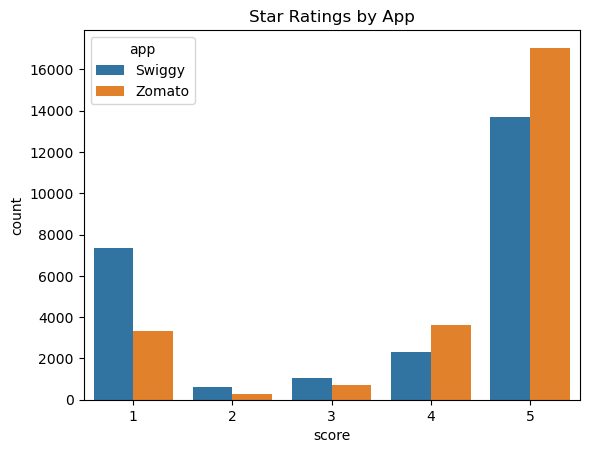

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_all_reviews, x='score', hue='app')
plt.title("Star Ratings by App")
plt.show()

**Insight**:

**Swiggy** has a relatively higher number of 1-star reviews compared to Zomato, indicating potential dissatisfaction areas. Zomato has a slightly more balanced rating distribution.

**Zomato** overall has **higher ratings** than Swiggy.



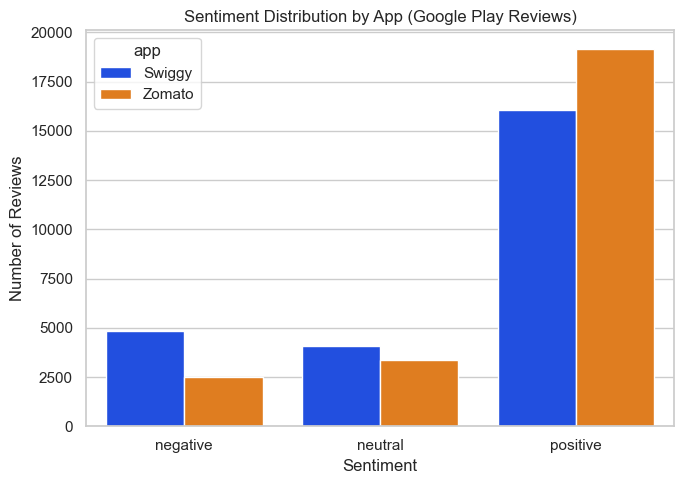

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.countplot(data=df_all_reviews, x='sentiment', hue='app', palette='bright')

plt.title("Sentiment Distribution by App (Google Play Reviews)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


**Insight**:

Based on sentiment analysis of user reviews:

**Zomato** shows a relatively more **positive public sentiment**, with a higher proportion of reviews classified as *positive*.

**Swiggy**, on the other hand, has received a greater share of **negative reviews**, indicating user dissatisfaction in more cases.

> This suggests Zomato users are generally more satisfied with their experience compared to Swiggy users, based on review text sentiment rather than just star ratings.

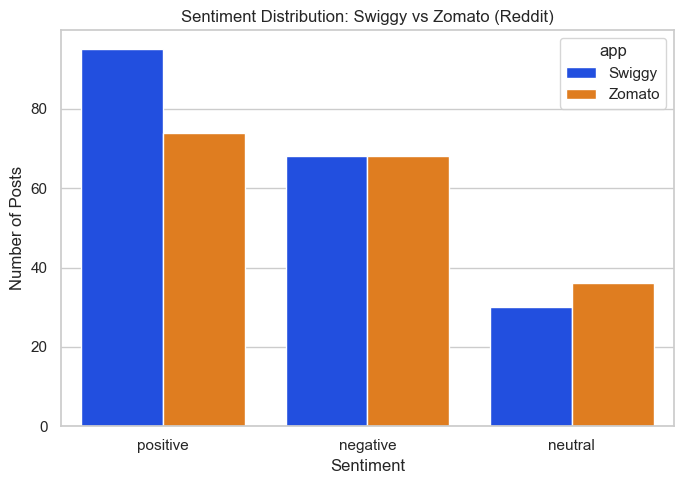

In [201]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_reddit, x='sentiment', hue='app', palette='bright')
plt.title("Sentiment Distribution: Swiggy vs Zomato (Reddit)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


- **Swiggy** has a higher number of **positive posts**, but also a high count of **negative reviews**.
- **Zomato** maintains a more balanced distribution, with slightly **fewer negative posts** and **higher neutral sentiment**.

> This mixed pattern suggests Swiggy is more polarizing — evoking both strong positive and negative emotions — while Zomato leans slightly more neutral overall.

In [86]:
df_all_reviews.groupby('app')['sentiment_score'].mean()

app
Swiggy    0.199621
Zomato    0.339735
Name: sentiment_score, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_6300\1644142490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='app', y='score', data=avg_scores, palette='bright')


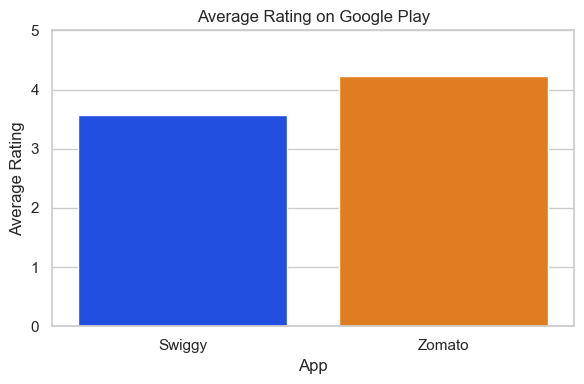

In [212]:
avg_scores = df_all_reviews.groupby('app')['score'].mean().reset_index()
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='app', y='score', data=avg_scores, palette='bright')

plt.title("Average Rating on Google Play")
plt.ylim(0, 5)
plt.ylabel("Average Rating")
plt.xlabel("App")
plt.tight_layout()
plt.show()


Zomato has **higher** average ratings on Google Play Store.

C:\Users\HP\AppData\Local\Temp\ipykernel_6300\2444492768.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='app', y='sentiment_score', data=avg_scores, palette='bright')


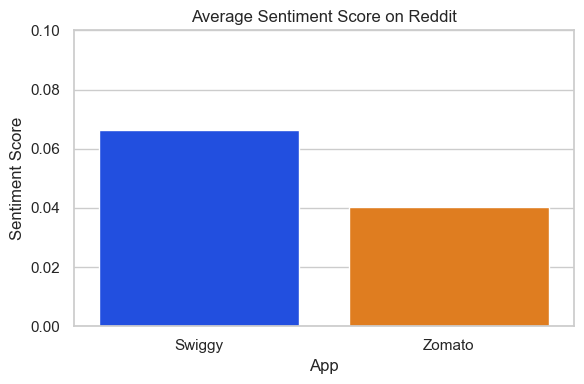

In [210]:
avg_scores = df_reddit.groupby('app')['sentiment_score'].mean().reset_index()
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='app', y='sentiment_score', data=avg_scores, palette='bright')

plt.title("Average Sentiment Score on Reddit")
plt.ylim(0, 0.10)
plt.ylabel("Sentiment Score")
plt.xlabel("App")
plt.tight_layout()
plt.show()


Swiggy has **higher** average sentiment scores based on Reddit posts and opinions.

In [124]:
monthly_sentiment = df_all_reviews.groupby('month')['sentiment_score'].mean().reset_index()

In [136]:
df_all_reviews['day'] = df_all_reviews['at'].dt.to_period('D').astype(str)

In [156]:
daily_sentiment = df_all_reviews.groupby(['app', 'day'])['sentiment_score'].mean().reset_index()

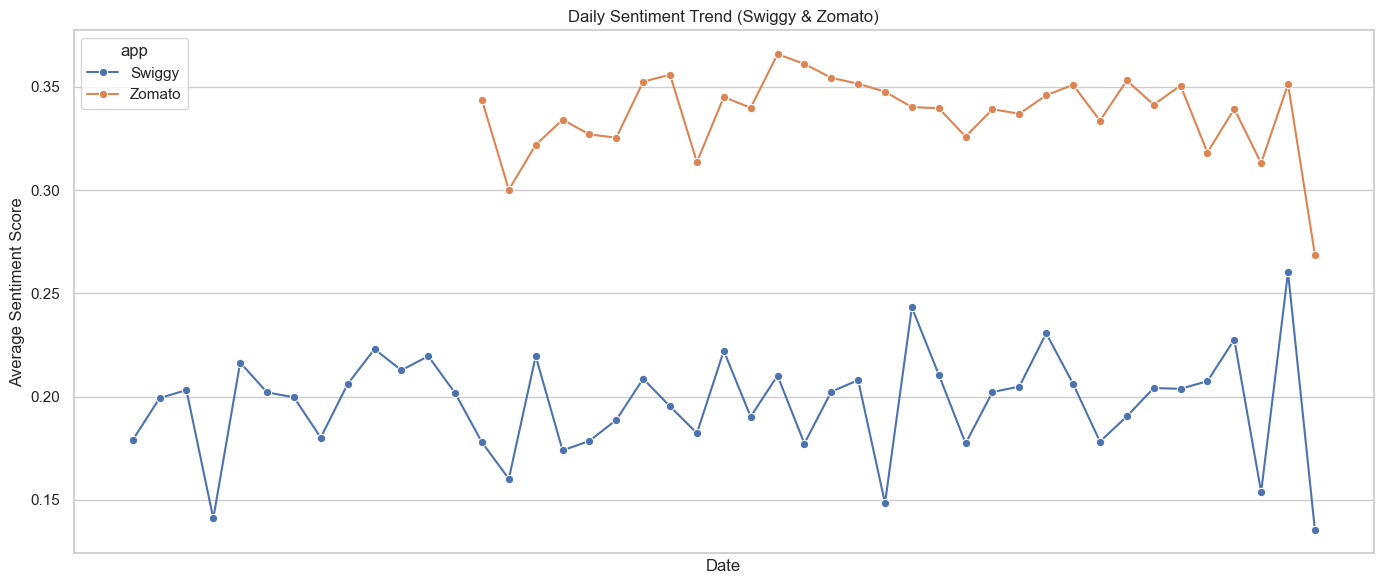

In [162]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sentiment, x='day', y='sentiment_score',hue='app', marker='o')

plt.title('Daily Sentiment Trend (Swiggy & Zomato)')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Date')
plt.xticks([], [])  
plt.grid(True)
plt.tight_layout()
plt.show()

**Zomato consistently scores higher** in average sentiment over time, maintaining a relatively stable sentiment around 0.33–0.36.


**Swiggy** shows more volatility with daily sentiment swinging widely, typically between 0.15–0.25. This trend indicates that **Zomato users express more stable and consistently positive opinions**, whereas **Swiggy's** user sentiment is more reactive and fluctuating.

## Conclusion

Based on our sentiment analysis of customer reviews:

**Zomato** shows a *more positive public sentiment*, more positive reviews with users frequently appreciating the service and food quality.

**Swiggy**, while popular, has garnered relatively more negative feedback.

These findings suggest that while both platforms are widely used, Zomato currently enjoys better user perception, which could influence customer loyalty and preference.

In [220]:
df_all_reviews.to_csv("reviews_clean.csv", index=False)
df_reddit.to_csv("reddit_clean.csv", index=False)